# 200_load_videogame_datasets

## Purpose 

In this notebook we will be cleaning the dataset of the IGN reviews. In the previous notebook we cleaned the games console sales dataset from the last 30 years. This notebook will be focussing on cleaning the data from the IGN reviews dataset.

## Datasets

- Input : IGN_Games_Reviews.csv
- Output : Clean_IGN_Games_Reviews.pkl

In [1]:
import os 
import sys
import pandas as pd 
import numpy as np
import hashlib
import matplotlib.pylab as plt 
from pandas import DataFrame 

%matplotlib inline 

In [2]:
if not os.path.exists("../../data/raw/IGN_Games_Reviews.csv"):
    print("Missing Dataset File")

## Loading the Dataset 

The dataset is stored in a csv file and we will open the file as follows 

In [3]:
IGN = pd.read_csv("../../data/raw/IGN_Games_Reviews.csv")

In [4]:
IGN.shape

(18625, 11)

The dataset is stored in a dataframe called IGN and the .shape function is particularly useful to identify how many rows and columns we are going to be dealing with. In this case we are dealing with 18k and 11 different columns.

We will check that the data has been loaded in correctly by printing the first 5 and last 5 lines of the dataframe

In [5]:
IGN.head()

Unnamed: 0 score_phrase                                              title  \
0           0      Amazing                            LittleBigPlanet PS Vita   
1           1      Amazing  LittleBigPlanet PS Vita -- Marvel Super Hero E...   
2           2        Great                               Splice: Tree of Life   
3           3        Great                                             NHL 13   
4           4        Great                                             NHL 13   

                                                 url          platform  score  \
0             /games/littlebigplanet-vita/vita-98907  PlayStation Vita    9.0   
1  /games/littlebigplanet-ps-vita-marvel-super-he...  PlayStation Vita    9.0   
2                          /games/splice/ipad-141070              iPad    8.5   
3                      /games/nhl-13/xbox-360-128182          Xbox 360    8.5   
4                           /games/nhl-13/ps3-128181     PlayStation 3    8.5   

        genre editors_choice  release_year  release_month  release_day  
0  Platformer              Y          2012              9           12  
1  Platformer              Y          2012              9           12  
2      Puzzle              N          2012              9           12  
3      Sports              N          2012              9           11  
4      Sports              N          2012              9           11

Now it will be useful to see how many games are released for each year so we will group the realease year and the platform and count the number of games released each year.

In [5]:
IGN.groupby('release_year')['release_year'].count()

release_year
1970       1
1996     149
1997     205
1998     339
1999     775
2000    1045
2001     688
2002     936
2003     969
2004     997
2005    1088
2006    1208
2007    1610
2008    1915
2009    1687
2010    1363
2011    1073
2012     753
2013     696
2014     537
2015     365
2016     226
Name: release_year, dtype: int64

Another useful thing to do will be to see how many games are released per console 

In [9]:
IGN.groupby('platform').count()

Unnamed: 0  score_phrase  title   url  score  genre  \
platform                                                                    
Android                       39            39     39    39     39     39   
Arcade                        11            11     11    11     11     11   
Atari 2600                     5             5      5     5      5      5   
Atari 5200                     2             2      2     2      2      2   
Commodore 64/128               6             6      6     6      6      5   
DVD / HD Video Game            1             1      1     1      1      1   
Dreamcast                    286           286    286   286    286    286   
Dreamcast VMU                  1             1      1     1      1      1   
Game Boy                      22            22     22    22     22     22   
Game Boy Advance             623           623    623   623    623    623   
Game Boy Color               356           356    356   356    356    356   
Game.Com                       3             3      3     3      3      3   
GameCube                     509           509    509   509    509    509   
Genesis                       58            58     58    58     58     58   
Linux                         10            10     10    10     10     10   
Lynx                          82            82     82    82     82     82   
Macintosh                     81            81     81    81     81     81   
Master System                 13            13     13    13     13     13   
N-Gage                        30            30     30    30     30     30   
NES                           49            49     49    49     49     49   
NeoGeo                        10            10     10    10     10     10   
NeoGeo Pocket Color           31            31     31    31     31     31   
New Nintendo 3DS               2             2      2     2      2      2   
Nintendo 3DS                 225           225    225   225    225    222   
Nintendo 64                  302           302    302   302    302    302   
Nintendo 64DD                  7             7      7     7      7      7   
Nintendo DS                 1045          1045   1045  1045   1045   1044   
Nintendo DSi                 254           254    254   254    254    252   
Ouya                           1             1      1     1      1      1   
PC                          3370          3370   3370  3370   3370   3367   
PlayStation                  952           952    952   952    952    952   
PlayStation 2               1686          1686   1686  1686   1686   1684   
PlayStation 3               1356          1356   1356  1356   1356   1355   
PlayStation 4                277           277    277   277    277    277   
PlayStation Portable         633           633    633   633    633    632   
PlayStation Vita             155           155    155   155    155    155   
Pocket PC                      1             1      1     1      1      1   
Saturn                         6             6      6     6      6      6   
Sega 32X                      16            16     16    16     16     16   
Sega CD                        1             1      1     1      1      1   
SteamOS                        1             1      1     1      1      1   
Super NES                     33            33     33    33     33     33   
TurboGrafx-16                 40            40     40    40     40     40   
TurboGrafx-CD                  3             3      3     3      3      3   
Vectrex                        2             2      2     2      2      2   
Web Games                      1             1      1     1      1      1   
Wii                         1366          1366   1366  1366   1366   1362   
Wii U                        114           114    114   114    114    114   
Windows Phone                 14            14     14    14     14     14   
Windows Surface                1             1      1     1      1      1   
Wireless          

## Identifying Missing Values

We would also like to see how many unique consoles we are dealing with for our analyses. This will make it easier when we are comparing this dataset with our other dataset.

In [10]:
IGN['platform'].unique()

array(['PlayStation Vita', 'iPad', 'Xbox 360', 'PlayStation 3',
       'Macintosh', 'PC', 'iPhone', 'Nintendo DS', 'Nintendo 3DS',
       'Android', 'Wii', 'PlayStation 4', 'Wii U', 'Linux',
       'PlayStation Portable', 'PlayStation', 'Nintendo 64', 'Saturn',
       'Lynx', 'Game Boy', 'Game Boy Color', 'NeoGeo Pocket Color',
       'Game.Com', 'Dreamcast', 'Dreamcast VMU', 'WonderSwan', 'Arcade',
       'Nintendo 64DD', 'PlayStation 2', 'WonderSwan Color',
       'Game Boy Advance', 'Xbox', 'GameCube', 'DVD / HD Video Game',
       'Wireless', 'Pocket PC', 'N-Gage', 'NES', 'iPod', 'Genesis',
       'TurboGrafx-16', 'Super NES', 'NeoGeo', 'Master System',
       'Atari 5200', 'TurboGrafx-CD', 'Atari 2600', 'Sega 32X', 'Vectrex',
       'Commodore 64/128', 'Sega CD', 'Nintendo DSi', 'Windows Phone',
       'Web Games', 'Xbox One', 'Windows Surface', 'Ouya',
       'New Nintendo 3DS', 'SteamOS'], dtype=object)

As we can see there are far more consoles than the previous dataset. So this dataset will be more useful to analyse our research questions to do with individual console analyses

In [11]:
IGN.isnull().sum()

Unnamed: 0         0
score_phrase       0
title              0
url                0
platform           0
score              0
genre             36
editors_choice     0
release_year       0
release_month      0
release_day        0
dtype: int64

As seen above we are going to identify the columns that have missing values. Unlike our previous dataset this one seems to have a lot more values meaning there are far less missing values which is good as it will help our analyses further on.

Lets plot a graph that will include the missing values so that we can visualise it further. 

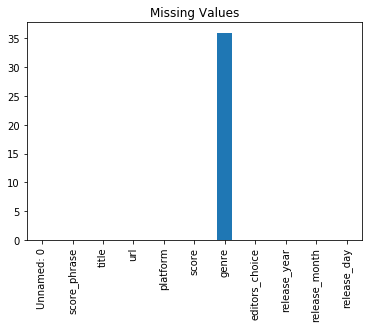

In [12]:
IGN.isnull().sum().plot(kind='bar', title = 'Missing Values' )

As we can see there is only one column with missing values which is genre which has a total of 36 missing values.

In [14]:
IGN_clean  = IGN.dropna(subset = ['genre'])

In [15]:
IGN_clean.shape

(18589, 11)

In [16]:
IGN_clean.isnull().sum()

Unnamed: 0        0
score_phrase      0
title             0
url               0
platform          0
score             0
genre             0
editors_choice    0
release_year      0
release_month     0
release_day       0
dtype: int64

As we can see above we have dropped the missing values for genre rows that contained null entries. This was stored in a new dataframe called IGN_clean. In order to check that the missing values were dropped successfully we will check the dataframe is null and sum it again just to make sure the new cleaned dataset has no missing values.

One thing that was also noticed is that there is a column which is only used for indexing. This column is just used as an index column and it is not particularly useful as it only represents the index. We will now also drop this column so that it will not cause us any issues in the further analyses

In [20]:
del IGN_clean['Unnamed: 0']

In [23]:
IGN_clean.isnull().sum()

score_phrase      0
title             0
url               0
platform          0
score             0
genre             0
editors_choice    0
release_year      0
release_month     0
release_day       0
dtype: int64

As seen above this column called Unnamed: 0 which was only used as an index column is now removed and no longer part of our clean dataset so we can proceed to savin the cleaned dataset.

## Saving the Dataset

For now lets save the dataset to a new file

The dataset will be saved into a pickle file. 

In [24]:
IGN_clean.columns

Index(['score_phrase', 'title', 'url', 'platform', 'score', 'genre',
       'editors_choice', 'release_year', 'release_month', 'release_day'],
      dtype='object')

In [25]:
columns_to_save = ['score_phrase', 'title', 'url', 'platform', 'score', 'genre',
       'editors_choice', 'release_year', 'release_month', 'release_day']

### Saving to Pickle file

In [27]:
pickle_save_time = %timeit -o IGN_clean[columns_to_save].to_pickle("200_videogame.pkl")

65.8 ms ± 8.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
